In [266]:
import pandas as pd
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import numpy as np 

import seaborn as sns
import random
import json
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Importing Data

In [267]:
data = pd.read_csv('/Users/louis/Desktop/AB_NYC_2019.csv')
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


# Exploring Data 

In [268]:
data.shape

(48895, 16)

In [269]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [270]:
data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

# Cleaning Data 

In [271]:
data.drop(['id', 'name', 'host_id', 'host_name', 'last_review'], axis= 1,inplace=True)

In [272]:
data['reviews_per_month'].fillna(0, inplace=True)

In [273]:
data.isnull().sum()

neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [274]:
data.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


# check correlation 

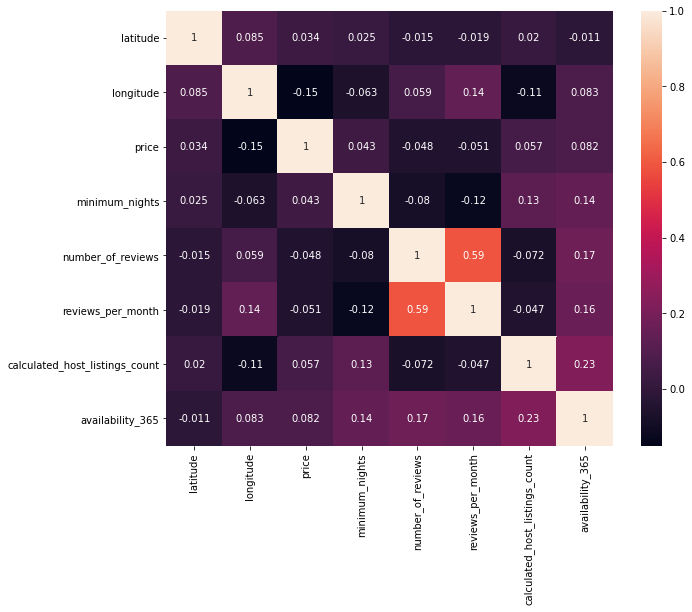

In [275]:
corrmat = data.corr(method='pearson')
fig, ax = plt.subplots(figsize=(10,8))
ax = sns.heatmap(corrmat, annot=True)
plt.show()


# Visualize the Data

In [276]:
data['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [277]:
data['neighbourhood'].value_counts()

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
New Dorp                 1
Woodrow                  1
Willowbrook              1
Fort Wadsworth           1
Rossville                1
Name: neighbourhood, Length: 221, dtype: int64

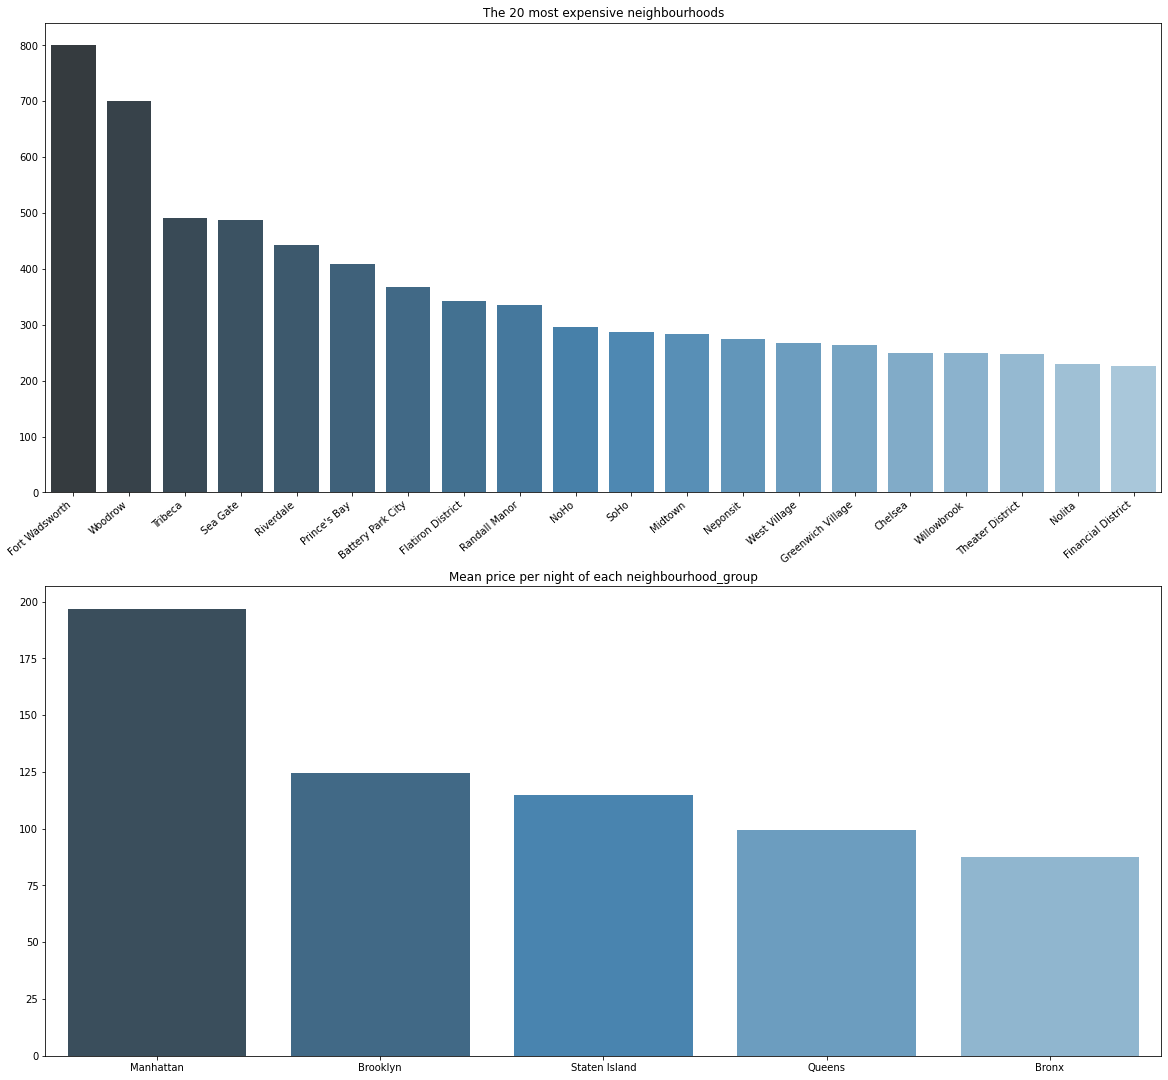

In [278]:
area_p = data.groupby('neighbourhood')['price'].mean().sort_values(ascending=False)

fig, ax= plt.subplots(2,1, figsize=(20,19))
sns.barplot(area_p.index.tolist()[:20], area_p.values[:20], ax=ax[0], palette=("Blues_d"))
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=40, ha="right")
ax[0].set_title('The 20 most expensive neighbourhoods')

area_p = data.groupby('neighbourhood_group')['price'].mean().sort_values(ascending=False)[:5]
sns.barplot(area_p.index.tolist(), area_p.values, ax=ax[1], palette=("Blues_d"))
ax[1].set_title('Mean price per night of each neighbourhood_group')

fig.show()

 Price per night depending on minimum nights 

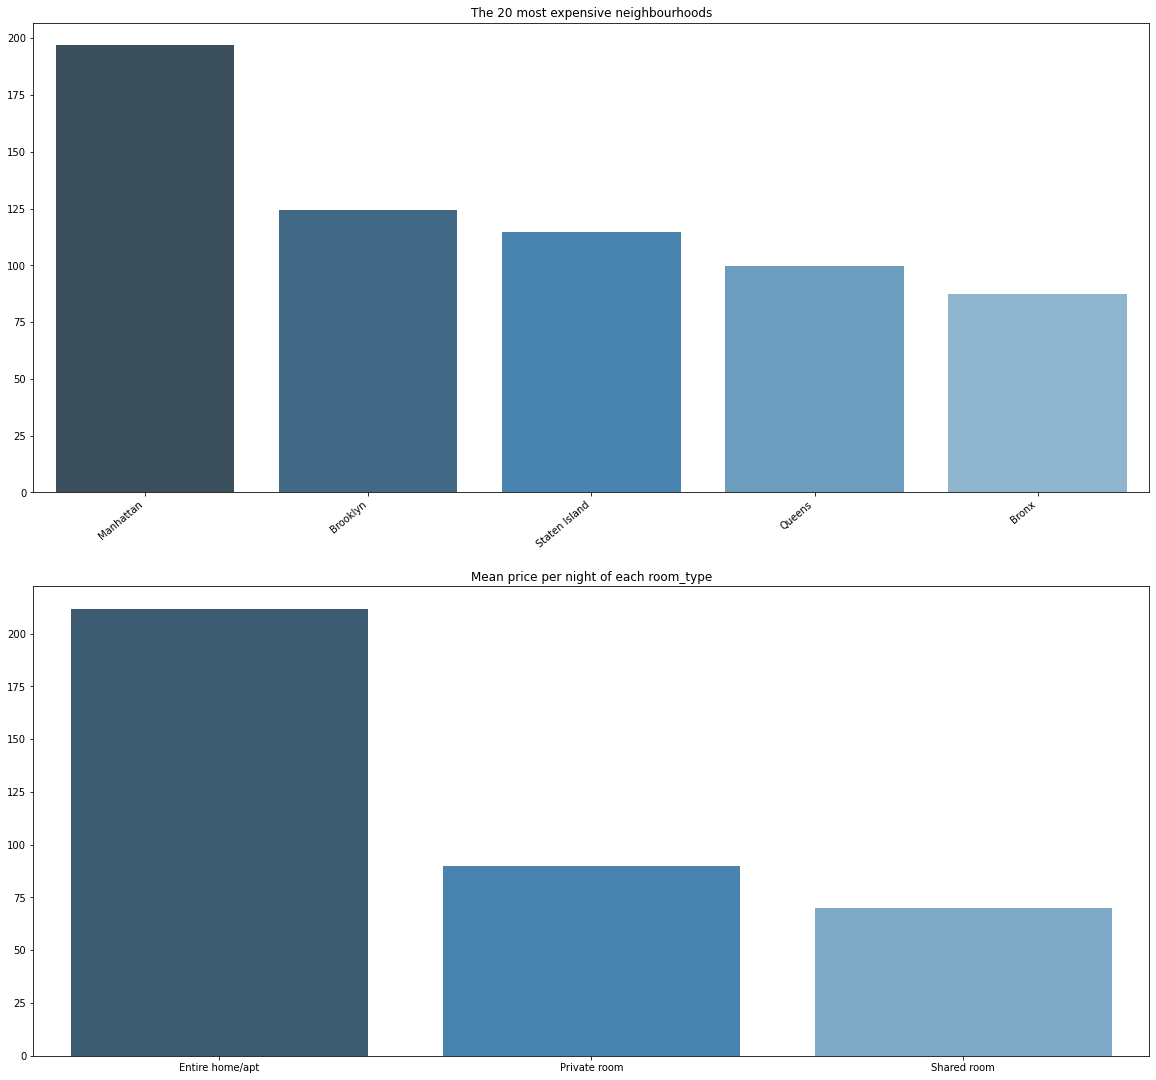

In [279]:
type_p = data.groupby('room_type')['price'].mean().sort_values(ascending=False)


fig, ax= plt.subplots(2,1, figsize=(20,19))
sns.barplot(area_p.index.tolist()[:20], area_p.values[:20], ax=ax[0], palette=("Blues_d"))
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=40, ha="right")
ax[0].set_title('The 20 most expensive neighbourhoods')

type_p = data.groupby('room_type')['price'].mean().sort_values(ascending=False)[:3]
sns.barplot(type_p.index.tolist(), type_p.values, ax=ax[1], palette=("Blues_d"))
ax[1].set_title('Mean price per night of each room_type')

fig.show() 

# see tableau for more graphs 

# Regression Analysis 
Based on Price, neighbourhood group, room type, minimun number of nights, Availibility over 365 days

In [408]:
data.head()

,neighbourhood_group,room_type,price,minimum_nights,experience,availability_365
0,Brooklyn,Private room,149.0,1,0,365
1,Manhattan,Entire home/apt,225.0,1,0,355
2,Manhattan,Private room,150.0,3,0,365
3,Brooklyn,Entire home/apt,89.0,1,0,194
4,Manhattan,Entire home/apt,80.0,10,0,0


In [409]:
data.drop(['latitude', 'longitude', 'number_of_reviews', 'reviews_per_month','neighbourhood'], axis=1, inplace=True)

KeyError: "['latitude' 'longitude' 'number_of_reviews' 'reviews_per_month'\n 'neighbourhood'] not found in axis"

In [410]:
feat = data 

In [411]:
feat.head()

,neighbourhood_group,room_type,price,minimum_nights,experience,availability_365
0,Brooklyn,Private room,149.0,1,0,365
1,Manhattan,Entire home/apt,225.0,1,0,355
2,Manhattan,Private room,150.0,3,0,365
3,Brooklyn,Entire home/apt,89.0,1,0,194
4,Manhattan,Entire home/apt,80.0,10,0,0


In [412]:
feat.describe()

,price,minimum_nights,experience,availability_365
count,39296.000000,39296.000000,39296.000000,39296.000000
mean,120.947272,6.728675,0.073010,107.367595
std,55.601641,20.345340,0.260156,129.306978
min,49.000000,1.000000,0.000000,0.000000
25%,75.000000,1.000000,0.000000,0.000000
50%,105.000000,2.000000,0.000000,37.000000
75%,155.000000,5.000000,0.000000,209.000000
max,267.000000,1250.000000,1.000000,365.000000


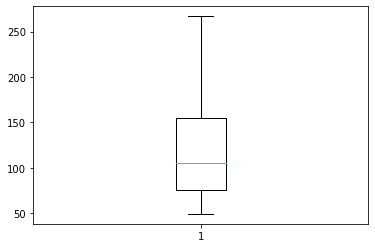

In [413]:
plt.boxplot(feat["price"])
plt.show()

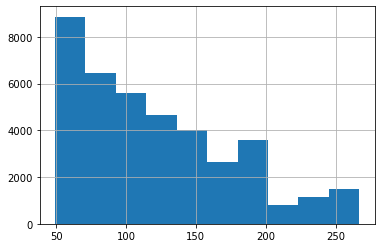

In [414]:
feat.price.hist()

We can see some outlier in price so let's remove them using IQR

In [415]:
print(feat['price'].skew())
feat['price'].describe()

0.7113913564910208


count    39296.000000
mean       120.947272
std         55.601641
min         49.000000
25%         75.000000
50%        105.000000
75%        155.000000
max        267.000000
Name: price, dtype: float64

In [416]:
print(feat['price'].quantile(0.10))
print(feat['price'].quantile(0.90))

60.0
200.0


In [417]:
feat['price'] = np.where(feat['price'] <48.0, 48.0,feat['price'])
feat['price'] = np.where(feat['price'] >268.0, 268.0,feat['price'])
print(feat['price'].skew())

0.7113913564910208


We got 0.72 which is much better than 19.1 we previously had 

In [418]:
index = feat[(feat['price'] >= 268)|(feat['price'] <= 48)].index
feat.drop(index, inplace=True)
feat['price'].describe()

count    39296.000000
mean       120.947272
std         55.601641
min         49.000000
25%         75.000000
50%        105.000000
75%        155.000000
max        267.000000
Name: price, dtype: float64

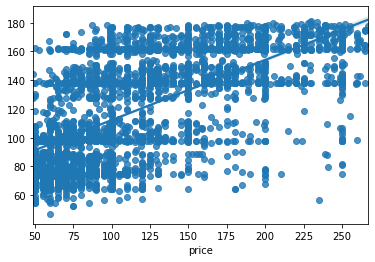

In [419]:
import seaborn as sns 
sns.regplot(y_test, y_pred)

In [420]:
#Less than 10 listings = Amateurs = 0

feat['calculated_host_listings_count'].values[feat['calculated_host_listings_count'] < 7] = 0

KeyError: 'calculated_host_listings_count'

In [ ]:
# More than 10 listings = Professionals = 1

feat['calculated_host_listings_count'].values[feat['calculated_host_listings_count'] > 6] = 1

In [421]:
feat['calculated_host_listings_count'].value_counts()

KeyError: 'calculated_host_listings_count'

In [422]:
#rename 'calculated_host_listings_count' to 'experience'

feat.rename(columns={'neighbourhood_group': 'neighbourhood_group', 'room_type': 'room_type', 'price':'price', 'minimum_nights': 'minimum_nights', 'calculated_host_listings_count': 'experience', 'availability_365': 'availability_365'}, inplace=True)

In [423]:
feat.head()

,neighbourhood_group,room_type,price,minimum_nights,experience,availability_365
0,Brooklyn,Private room,149.0,1,0,365
1,Manhattan,Entire home/apt,225.0,1,0,355
2,Manhattan,Private room,150.0,3,0,365
3,Brooklyn,Entire home/apt,89.0,1,0,194
4,Manhattan,Entire home/apt,80.0,10,0,0


In [466]:
feat['room_type'].value_counts()

Entire home/apt    20888
Private room       17876
Shared room          532
Name: room_type, dtype: int64

In [467]:
#get num and cat columns

categoricals = feat.select_dtypes(np.object)
numericals = feat.select_dtypes(np.number)

In [469]:
#encode

cat_encoded = pd.get_dummies(categoricals)
cat_encoded.head()

,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,0,1,0,0,0,0,1,0
1,0,0,1,0,0,1,0,0
2,0,0,1,0,0,0,1,0
3,0,1,0,0,0,1,0,0
4,0,0,1,0,0,1,0,0


In [473]:
feat_en = pd.concat([numericals.iloc[:,:-1],cat_encoded,numericals.iloc[:,-1]],axis=1)
print("The dataset size is: ", feat_en.shape)
print()

feat_en

The dataset size is:  (39296, 12)



,price,minimum_nights,experience,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,availability_365
0,149.0,1,0,0,1,0,0,0,0,1,0,365
1,225.0,1,0,0,0,1,0,0,1,0,0,355
2,150.0,3,0,0,0,1,0,0,0,1,0,365
3,89.0,1,0,0,1,0,0,0,1,0,0,194
4,80.0,10,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
48889,65.0,1,0,0,0,0,1,0,0,1,0,163
48890,70.0,2,0,0,1,0,0,0,0,1,0,9
48892,115.0,10,0,0,0,1,0,0,1,0,0,27
48893,55.0,1,0,0,0,1,0,0,0,0,1,2


In [474]:
feat_en_correct.head()

,minimum_nights,experience,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,availability_365
0,1,0,0,1,0,0,0,0,1,0,365
1,1,0,0,0,1,0,0,1,0,0,355
2,3,0,0,0,1,0,0,0,1,0,365
3,1,0,0,1,0,0,0,1,0,0,194
4,10,0,0,0,1,0,0,1,0,0,0


In [475]:
from sklearn.preprocessing import StandardScaler

feat_en_correct = feat_en.drop(columns=['price'])
transformer = StandardScaler().fit(feat_en_correct)
x_standardized = transformer.transform(feat_en_correct)

In [476]:
feat_en_correct.head()

,minimum_nights,experience,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,availability_365
0,1,0,0,1,0,0,0,0,1,0,365
1,1,0,0,0,1,0,0,1,0,0,355
2,3,0,0,0,1,0,0,0,1,0,365
3,1,0,0,1,0,0,0,1,0,0,194
4,10,0,0,0,1,0,0,1,0,0,0


In [477]:
#y = feat_en['price']
#X= feat_en.drop(['price'],axis=1)

# Standardized 

full_standardized = pd.DataFrame(x_standardized, columns=feat_en_correct.columns)
full_standardized.head()
X = full_standardized
y = feat_en['price']

In [478]:
full_standardized

,minimum_nights,experience,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,availability_365
0,-0.281575,-0.280643,-0.140246,1.183422,-0.895124,-0.355544,-0.084409,-1.065234,1.094648,-0.11715,1.992435
1,-0.281575,-0.280643,-0.140246,-0.845007,1.117164,-0.355544,-0.084409,0.938761,-0.913536,-0.11715,1.915098
2,-0.183272,-0.280643,-0.140246,-0.845007,1.117164,-0.355544,-0.084409,-1.065234,1.094648,-0.11715,1.992435
3,-0.281575,-0.280643,-0.140246,1.183422,-0.895124,-0.355544,-0.084409,0.938761,-0.913536,-0.11715,0.669983
4,0.160792,-0.280643,-0.140246,-0.845007,1.117164,-0.355544,-0.084409,0.938761,-0.913536,-0.11715,-0.830342
...,...,...,...,...,...,...,...,...,...,...,...
39291,-0.281575,-0.280643,-0.140246,-0.845007,-0.895124,2.812589,-0.084409,-1.065234,1.094648,-0.11715,0.430241
39292,-0.232423,-0.280643,-0.140246,1.183422,-0.895124,-0.355544,-0.084409,-1.065234,1.094648,-0.11715,-0.760739
39293,0.160792,-0.280643,-0.140246,-0.845007,1.117164,-0.355544,-0.084409,0.938761,-0.913536,-0.11715,-0.621533
39294,-0.281575,-0.280643,-0.140246,-0.845007,1.117164,-0.355544,-0.084409,-1.065234,-0.913536,8.53608,-0.814874


In [479]:
#StandardScaler

#scaler = StandardScaler().fit(X)
#X_prep = scaler.transform(X)

In [480]:
# train test split


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.1,random_state=220)

X_train.head()
y_train.head()

34373    250.0
11805    108.0
30815     90.0
19006    105.0
48549     65.0
Name: price, dtype: float64

In [481]:
#Linear Regression Model
reg=LinearRegression()
reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)
from sklearn.metrics import r2_score

print('R-squared traint score: {:.3f}'.format(reg.score(X_train, y_train)))
print('R-squared test score: {:.3f}'.format(reg.score(X_test, y_test)))


R-squared traint score: 0.415
R-squared test score: 0.417


In [482]:
# decision tree
DecisionTree=DecisionTreeRegressor(min_samples_leaf=.0001)
DecisionTree.fit(X_train,y_train)

print('R-squared score training: {:.3f}'.format(DecisionTree.score(X_train, y_train)))
print('R-squared score test: {:.3f}'.format(DecisionTree.score(X_test, y_test)))


R-squared score training: 0.537
R-squared score test: 0.354


In [483]:
#Random Forest

RandomForest = RandomForestRegressor()
RandomForest.fit(X_train, y_train)

print('R-squared score training: {:.3f}'.format(RandomForest.score(X_train, y_train)))
print('R-squared score test: {:.3f}'.format(RandomForest.score(X_test, y_test)))


R-squared score training: 0.599
R-squared score test: 0.341


In [484]:

MAE = mean_absolute_error(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
R2 = r2_score(y_test, y_pred)
 
print("The mean absolute error of the model in the test set is: %6.2f" % (MAE))
print("The mean squared error of the model in the test set is: %6.2f" % (MSE))
print("The root mean squared error of the model in the test set is: %6.2f" % (RMSE))
print("The R2 of the model in the test set is: %4.2f" % (R2))

The mean absolute error of the model in the test set is:  32.83
The mean squared error of the model in the test set is: 1820.35
The root mean squared error of the model in the test set is:  42.67
The R2 of the model in the test set is: 0.42


In [485]:
feat['room_type'].value_counts()

Entire home/apt    20888
Private room       17876
Shared room          532
Name: room_type, dtype: int64

In [357]:
# TO DO !!!!

#predict price when client enter the neigbhood group (Manhattan, Brooklyn, Bronx, Staten Island or Queens
# then his experience (amateur or professional), then the min number of nights,
# then the room type (Private Room, Entire home/apt or share room) , and then the availibility over 365 days
X_train.columns


def prediction():

    neig = input('neighbourhood: ').lower()
    min_night = int(input('minimum nights: '))
    experience = input('Amateur or Professional: ')
    room_type = input('room type: ').lower()
    availibility = int(input('availibility over 365 days: '))
    
    lookup = {'brooklyn': [1,0,0,0,0], 'manhattan': [0,1,0,0,0], 'bronx': [0,0,1,0,0], 'staten island': [0,0,0,1,0],
              'queens': [0,0,0,0,1], 'entire home/apt': [1,1,0,0,0], 'private room': [0,1,1,0,0], 'shared room': [0,0,1,1,0]}

    features = np.array([[min_night, experience] + lookup[neig] + lookup[room_type] +
                        [availability]])

    
    
    predictions = model.predict(features)
    
    return predictions[0]



#def price_suggestion(neighborhood_group, minimum_night, experience, room_type, availibility_365)

#for i in 

array([131.12933333,  69.14696917,  63.29066667, ...,  67.95354284,
       124.59018725, 136.359     ])

In [561]:


def prediction(features, model, scaler):
    
    neig = input('neighbourhood: ').lower()
    min_night = int(input('minimum nights: '))
    experience = input('Amateur or Professional: ').lower()
    room_type = input('room type: ').lower()
    availibility = int(input('availibility over 365 days: '))
    
    lookup = {'brooklyn': [1,0,0,0,0], 'manhattan': [0,1,0,0,0], 'bronx': [0,0,1,0,0], 'staten island': [0,0,0,1,0],
              'queens': [0,0,0,0,1], 'entire': [1,0,0], 'private': [0,1,0], 'shared': [0,0,1], 'amateur': [0], 
              'professional': [1]}

    features = np.array([[min_night] + lookup[experience] + lookup[neig] + lookup[room_type] +
                        [availibility]])

    
    features = scaler.transform(features) 

    predictions = model.predict(features)

    
    Total_Income_year = 0.4 * availibility * predictions[0] 

    
    return Total_Income_year


In [562]:

prediction(features, RandomForest, transformer)

neighbourhood: manhattan
minimum nights: 2
Amateur or Professional: amateur
room type: entire
availibility over 365 days: 365


25792.59437343213

In [529]:
features

array(['minimum_nights', 'experience', '1', '0', '0', '0', '0',
       'room_type_Private room', 'room_type_Shared room',
       'availability_365'], dtype='<U22')